<a href="https://colab.research.google.com/github/SamoaChen/Modern_Control/blob/main/Modern_Control_HW3_Classical_Control_Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install slycot

In [ ]:
pip install control

HW3 Requirements:

1) Reproduce Example 2.4, doExercise 2.1, and reproduce Figure 2.8. Also, plot a Bode plot with S, T. Over which frequency range do you have good performance?

2) Reproduce Example 2.5, Figure 2.9. Also, plot a Nyquist plot and use Nyquist criterium to do a stability analysis.

3) Do exercise 2.2

4) Reproduce Example 2.5 (p. 30, 34)

In [ ]:
#-----Import packages
import math
import numpy as np
import control as ctrl
from control.matlab import *
import matplotlib.pyplot as plt

# $Part 1$


In [ ]:
#-----REPRODUCE EXAMPLE 2.4
# Define s
s = tf('s')

# Plant 
G = 3*(-2*s+1) / (10*s + 1)/(5*s+1)

# Old Controller
Kc = 1.5
# Old Sensitivity Function
S = 1/(1+Kc*G)
# Old Steady-State Error for Step Response
error = -float(ctrl.dcgain(S))
print("Without integral control, the steady state error is: %1.2f"%error)

# New Controller Design
Ku = 2.5 #Ultimate Gain
Pu = 15.2 #Corresponding Oscillation
Kc = Ku/2.2
Ti = Pu/1.2
K = Kc*(1+1/Ti/s)

# Sensitivity Function
S = 1/(1+K*G)
# New Steady-State Error for Step Response
error = -float(ctrl.dcgain(S))
print("With integral control, the steady state error is: %1.2f"%error)

Without integral control, the steady state error is: -0.18
With integral control, the steady state error is: -0.00


In [ ]:
#-----Exercise 2.1
gm, pm, wg, wp = margin(G)
Ku = gm # gain margin is 1/|G(w-180)| which is Ku
Pu = 2*math.pi/wg
print("The value for Ku is: %1.2f"%Ku)
print("The value for Pu is: %1.2f s"%Pu)

The value for Ku is: 2.50
The value for Pu is: 15.24 s


Text(0.5, 1.0, 'Figure 2.8: Step Response')

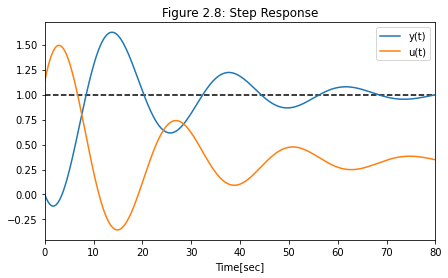

In [ ]:
#-----Figure 2.8
# Range of Simulation
t = np.linspace(0,100,1000)
# Close Loop Sys
G_c = S*K*G
# Input Transfer Function
U = S*K

#------Plot figure 2.8
fig, ax = plt.subplots(figsize=(7,4))
yout1, T1 = step(G_c, t)
yout2, T2 = step(U, t)
plt.plot(T1,yout1,label='y(t)')
plt.plot(T2,yout2,label='u(t)')
plt.hlines(1,0,80,ls='--')
plt.xlim(0,80)
plt.legend()

ax.set_xlabel('Time[sec]')
ax.set_title('Figure 2.8: Step Response')

<function matplotlib.pyplot.show>

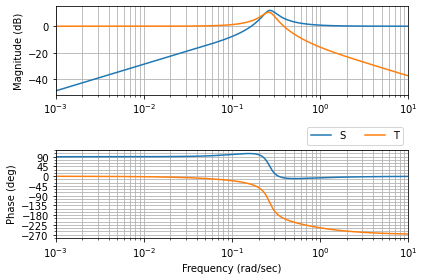

In [ ]:
#-----Plot the Corresponding Bode Plot
# Complementary Sensitivity Function
T = 1-S
# Plot the Bode Plot
fig,ax = plt.subplots()
omega = np.logspace(-3, 1, 10000)
magS, phaseS, omega = bode(S, omega)
magT, phaseT, omega = bode(T, omega)
plt.legend(["S", "T"],bbox_to_anchor=(0, 1, 1, 0), loc=4, ncol=3)
plt.xlim(1e-3,10)
plt.tight_layout()
plt.show

####$Write$  $Up$

For a system without disturbance and noise to have good reference tracking, the $T$ has to be claose to identity and $S$ has to be close to 0. Chose the $\omega_{B}$ as the maximum boundary, frequency that the system has a good performance is below around $0.15$ $ rad/s$ where $|S(s)|$ is $\geq$ 0.707

#$Part 2$

In [ ]:
#-----REPRODUCE EXAMPLE 2.5
# Unstable Plant 
G = 4/(s-1)/(0.02*s+1)/(0.02*s+1)

# Controller Design
Kc = 1.25
Ti = 1.5
K = Kc*(1+1/Ti/s)

Text(0.5, 1.0, 'Figure 2.9: Step Response')

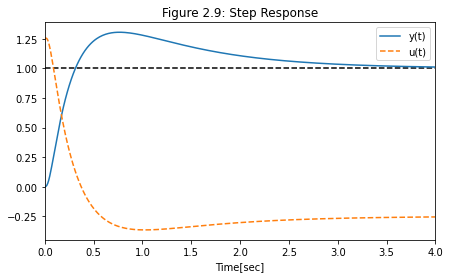

In [ ]:
# Figure 2.9
# Range of Simulation
t = np.linspace(0,10,1000)
# Sensitivity Function
S = 1/(1+K*G)
# Close Loop Sys
G_c = S*K*G
# Input Transfer Function
U = S*K

#------Plot figure 2.9
fig, ax = plt.subplots(figsize=(7,4))
yout1, T1 = step(G_c, t)
yout2, T2 = step(U, t)
plt.plot(T1,yout1,label='y(t)')
plt.plot(T2,yout2,label='u(t)', ls='--')
plt.hlines(1,0,4,ls='--')
plt.xlim(0,4)
plt.legend()

ax.set_xlabel('Time[sec]')
ax.set_title('Figure 2.9: Step Response')

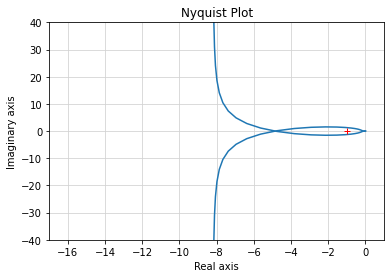

In [ ]:
# Corresponding Nyquist Plot
# Open Loop Transfer Function
L = G*K
# parameters
fig, ax = plt.subplots(figsize=(6,4))
real, imag, freq = nyquist(L)
plt.xlim(-17,1)
plt.ylim(-40,40)
ax.set_title('Nyquist Plot')
plt.show()

####$Write$  $Up$
Below is the Nyquist plot in log scale plotted using Matlab. From the figure, it is clear that the nyquist curve encircled -1 one time in anticlockwise direction. Recall that there is one RHP pole for the open loop transfer function, we can calculate the number of close loop RHP plole by $n_{c} = n_{q} + n_{o} = -1 + 1 = 0$. Thus we can conclude that there is no close loop RHP pole and the close loop system is stable.

<p float="left">
   <img src="https://github.com/SamoaChen/Modern_Control/blob/main/graph/HW4_Nyquist_Plot.jpg?raw=true" width="45%" height="45%">

#$Part 3$

$Exercise 2.2$

As stated in the class, $L\left [ f\left ( t-\theta  \right ) \right ] = e^{-\theta s}F(s)$ 

Substitute $j\omega$ into $s$, we get $e^{-j\theta\omega}$

According to Euler's law, the complex number represented by $e^{-j\theta\omega}$ has an phase of $-\theta\omega$. Thus, $e^{-\theta s}F(s)$ means adding a phase of $-\theta\omega$ to the phase diagram in the bode plot for $F(s)$

Because the Phase Margin is maximum change to the phase plot before the system become unstable, the maximum delay to the system before the system become unstable can be calculated as follow

$|\theta_{max}|= \frac{PM}{\omega_{c}}$ where the $s$ is being substituted with the crossing over frequency

#$Part 4$

The parameters of the open loop transfer function, sensitivity function and complementary function are listed below
GM = 18.7, GM_L = 0.2, PM = 59.5, M_S = 1.19, M_T = 1.38


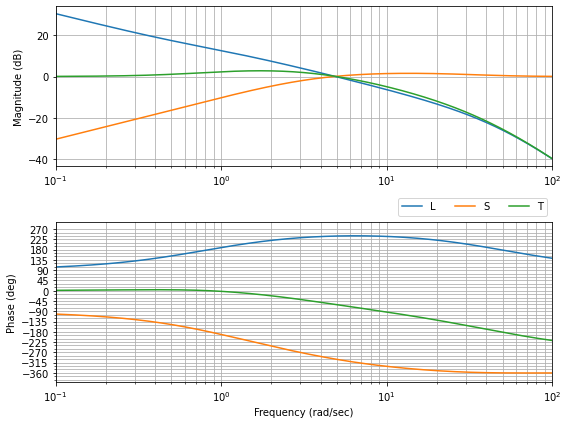

In [ ]:
#-----Example 2.5 Continued
# Complementary Sensitivity Function
T = 1-S

# Plot figure 2.15
fig,ax = plt.subplots(figsize=(8,6))
omega = np.logspace(-1, 2, 10000)
mag, phase, omega = bode(L, omega)
magS, phaseS, omega = bode(S, omega)
magT, phaseT, omega = bode(T, omega)
plt.legend(["L", "S", "T"],bbox_to_anchor=(0, 1.01, 1, 0), loc=4, ncol=3)
plt.xlim(1e-1,100)
plt.ylim(-400,300)
plt.tight_layout()
plt.show

# Calculate the margins
gm, pm, wg, wp = margin(L)
gm_l = gm #lower gain margin
gm_pos = np.where(phase == 3.1414050280804617)[0][0]
gm = 1/mag[gm_pos] #gain margin
Ms = max(magS) #maximum value of sensitivity function
Mt = max(magT) #maximum value of complementary sensitivity function
print('The parameters of the open loop transfer function, sensitivity function and complementary function are listed below')
print('GM = %1.1f, GM_L = %1.1f, PM = %1.1f, M_S = %1.2f, M_T = %1.2f'%(gm, gm_l, pm, Ms, Mt))

####$Write$  $Up$
The phse plot for $L$ is $360^{\circ}$ higher everywhere compare to the phase plot given by the text book